In [7]:
import seaborn as sns
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib import pyplot as plt
from paths import TEST_OUTPUT_DIR
import pandas as pd

In [8]:
path = "NotoSansTC-Medium.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)
sns.set(font=prop.get_name())

In [9]:
model_tests = {
    "no_controlnet": "僅基底",
    "0_hackersong": "舊版",
    "1": "第一代",
    "1_train_base": "第一代\n解鎖基底",
    "2": "第二代",
    "2_train_base": "第二代\n解鎖基底",
    "3_beat_mark": "第三代\n(人聲拍點)",
    "3_beat_mark-[from_accompaniment]": "第三代\n(伴奏拍點)",
    "3_beat_mark_train_base": "第三代\n解鎖基底\n(人聲拍點)",
    "3_beat_mark_train_base-[from_accompaniment]": "第三代\n解鎖基底\n(伴奏拍點)",
}

<Axes: xlabel='模型名稱', ylabel='平均輸入音樂類型在輸出伴奏之預測標註內出現的機率'>

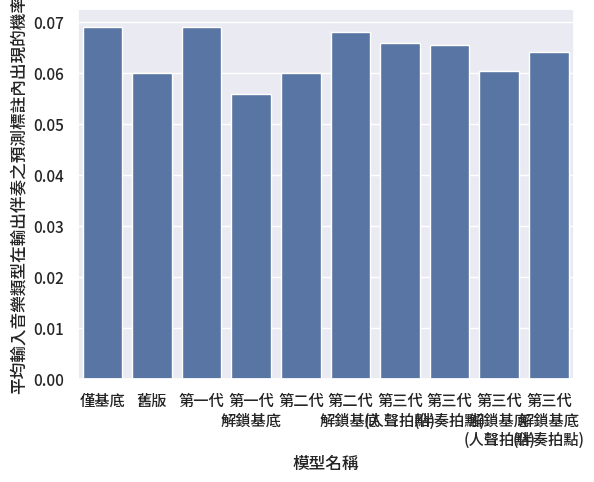

In [10]:
tags_data = {"模型名稱": [], "重疊比例 (%)": []}
genres_data = {"模型名稱": [], "平均輸入音樂類型在輸出伴奏之預測標註內出現的機率": []}


def parse_str_to_list(from_string: str):
    return from_string.replace("'", "").lstrip('[').rstrip(']').split(', ')


for model_test in model_tests.keys():
    df = pd.read_csv(TEST_OUTPUT_DIR / f"{model_test}_gs.csv")

    overlap_tag_proportions = []
    overlap_genre_chances = []

    for i, row in df.iterrows():
        ground_truth_genre = row["ground_truth_genre"]
        ground_truth_tags = row["ground_truth_tags"]
        output_tags = parse_str_to_list(row["output_tags"])

        overlap_tag_count = 0
        overlap_genre_count = 0

        for tag in output_tags:
            if tag in ground_truth_tags:
                overlap_tag_count += 1

            if tag == "new age":
                tag = "new-age"

            if tag == ground_truth_genre:
                overlap_genre_count += 1

        overlap_tag_proportions.append(overlap_tag_count / len(ground_truth_tags.split()) * 100)
        overlap_genre_chances.append(overlap_genre_count)

    genres_data["模型名稱"].append(model_tests[model_test])
    genres_data["平均輸入音樂類型在輸出伴奏之預測標註內出現的機率"].append(
        sum(overlap_genre_chances) / len(overlap_genre_chances))

    tags_data["模型名稱"].append(model_tests[model_test])
    tags_data["重疊比例 (%)"].append(
        sum(overlap_tag_proportions) / len(overlap_tag_proportions))

sns.barplot(genres_data, x="模型名稱", y="平均輸入音樂類型在輸出伴奏之預測標註內出現的機率")

[Text(0.5, 1.0, '各代各模型平均輸入標註與輸出伴奏之預測標註重疊比例長條圖')]

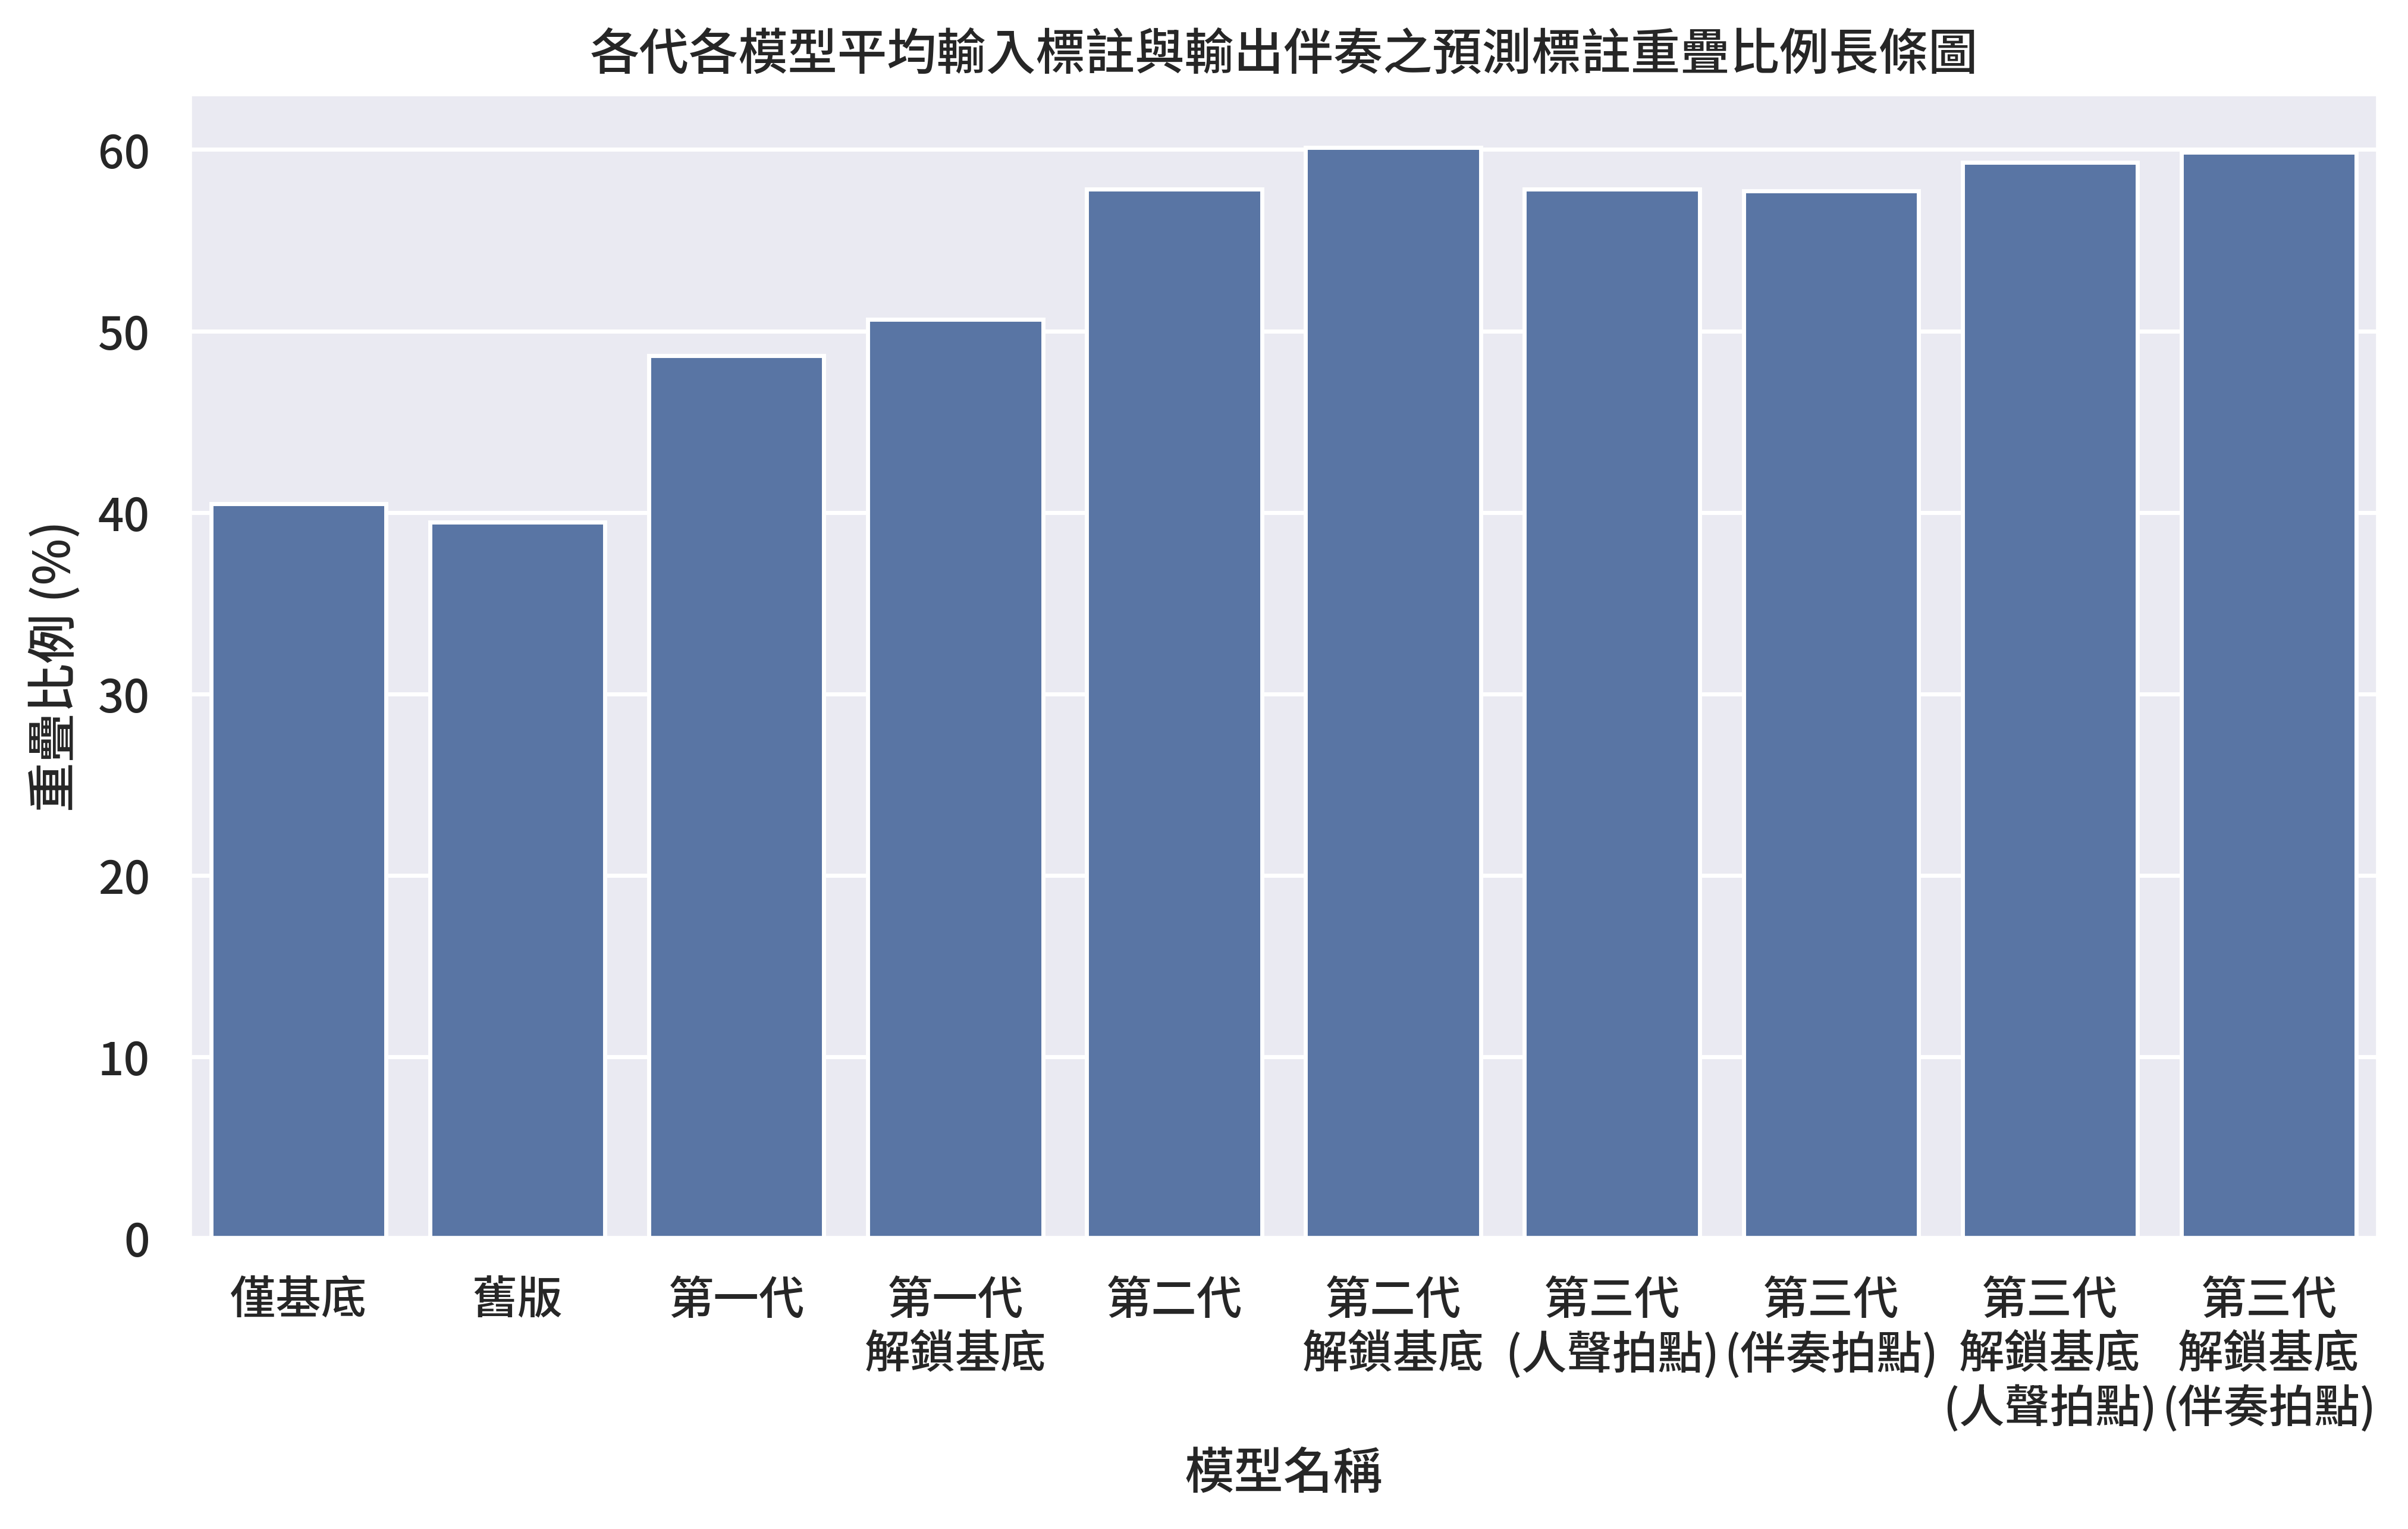

In [11]:
plt.figure(figsize=(9.5, 5), dpi=500)
fig = sns.barplot(tags_data, x="模型名稱", y="重疊比例 (%)")
fig.set(title="各代各模型平均輸入標註與輸出伴奏之預測標註重疊比例長條圖")